In [1]:
import pandas as pd
import pandas_datareader.data as web
import numpy as np
import matplotlib.pyplot as plt

from fbprophet import Prophet
from datetime import datetime

import set_matplotlib_hangul

%matplotlib inline

Hangul OK in your Windows !!!


In [2]:
pinkwink_web = pd.read_csv(
    '../data_fbprophet/05_PinkWink_Web_Traffic.csv',
    encoding='utf-8',
    thousands=',',
    names=['date', 'hit'],
    index_col=0
)
pinkwink_web = pinkwink_web[pinkwink_web['hit'].notnull()]
pinkwink_web.head()

,hit
date,
16. 7. 1.,766.0
16. 7. 2.,377.0
16. 7. 3.,427.0
16. 7. 4.,902.0
16. 7. 5.,850.0


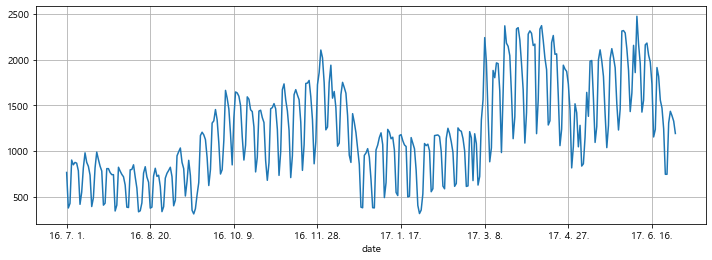

In [5]:
pinkwink_web['hit'].plot(figsize=(12,4), grid=True);

In [6]:
time  = np.arange(0, len(pinkwink_web))     # x축 좌표용 (0 ~ len(pinkwink_web))
traffic = pinkwink_web['hit'].values        # 실제값(참값)

fx = np.linspace(0, time[-1], 1000)         # 0부터 time[-1] 까지 1000개로 등간격 생성

In [7]:
def error(f, x, y):
    return np.sqrt(np.mean((f(x) - y) ** 2))        # f(x) 예측값, y 참값

In [8]:
fp1 = np.polyfit(time, traffic, 1)
f1 = np.poly1d(fp1)

f2p = np.polyfit(time, traffic, 2)
f2 = np.poly1d(f2p)

f3p = np.polyfit(time, traffic, 3)
f3 = np.poly1d(f3p)

f15p = np.polyfit(time, traffic, 15)
f15 = np.poly1d(f15p)

In [9]:
print(error(f1, time, traffic))
print(error(f2, time, traffic))
print(error(f3, time, traffic))
print(error(f15, time, traffic))


430.8597308110963
430.6284101894695
429.53280466762925
330.4777306313198


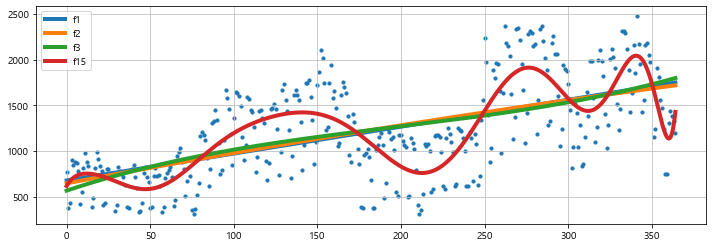

In [10]:
plt.figure(figsize=(12,4))
plt.scatter(time, traffic, s=10)        # raw 데이터
plt.plot(fx, f1(fx), lw=4, label='f1')
plt.plot(fx, f2(fx), lw=4, label='f2')
plt.plot(fx, f3(fx), lw=4, label='f3')
plt.plot(fx, f15(fx), lw=4, label='f15')

plt.grid(True, linestyle='-', color='0.75')
plt.legend(loc=2)
plt.show()

In [12]:
df = pd.DataFrame({'ds':pinkwink_web.index, 'y':pinkwink_web['hit']})
df.reset_index(inplace=True)
df['ds'] = pd.to_datetime(df['ds'], format='%y. %m. %d.')       # 원래 데이트 타입을 가져와서 새로운 데이트 타입으로 바꿈.
del df['date']
df.head()

,ds,y
0,2016-07-01,766.0
1,2016-07-02,377.0
2,2016-07-03,427.0
3,2016-07-04,902.0
4,2016-07-05,850.0


In [13]:
m = Prophet(yearly_seasonality=True, daily_seasonality=True)
m.fit(df);

In [14]:
future = m.make_future_dataframe(periods=60)
future.tail()

,ds
420,2017-08-25
421,2017-08-26
422,2017-08-27
423,2017-08-28
424,2017-08-29


In [15]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
420,2017-08-25,896.576571,679.849881,1095.312248
421,2017-08-26,481.544412,281.948341,693.637042
422,2017-08-27,614.212001,391.445963,815.568108
423,2017-08-28,1166.966207,959.816254,1379.819372
424,2017-08-29,1203.000155,987.444870,1421.373320


In [18]:
forecast.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'daily', 'daily_lower', 'daily_upper', 'weekly', 'weekly_lower',
       'weekly_upper', 'yearly', 'yearly_lower', 'yearly_upper',
       'multiplicative_terms', 'multiplicative_terms_lower',
       'multiplicative_terms_upper', 'yhat'],
      dtype='object')

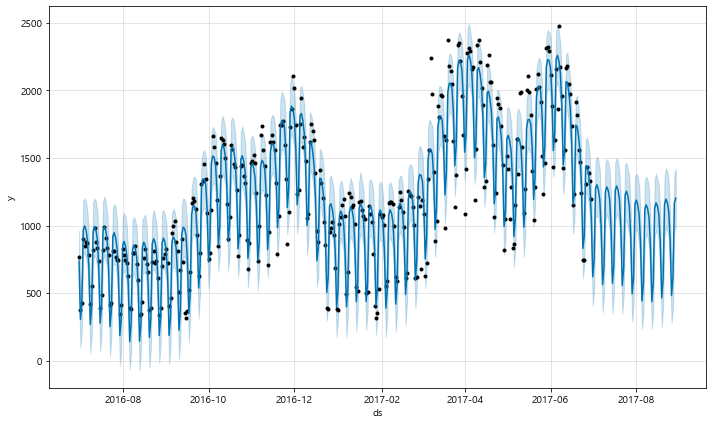

In [20]:
m.plot(forecast);

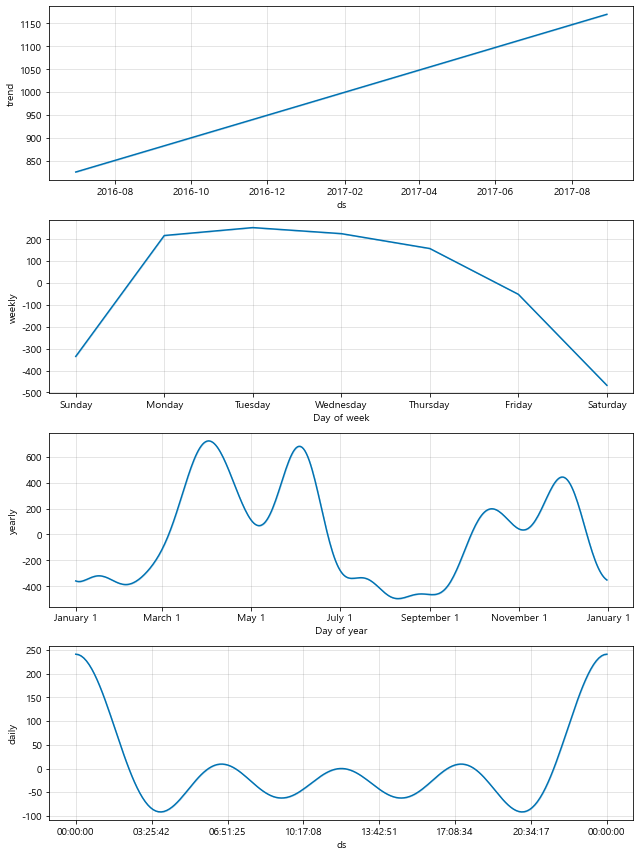

In [21]:
m.plot_components(forecast);